# Harun Harman - b2200765008

## PART I - Theory Questions

###  KNN Questions

### Question 1 - Answer

Because in knn algorithm, we are calculating the distance from a point to every other point in the dataset and we do this procedure for all the data points, it would be quite costly in terms of time complexity.

### Question 2 -Answer

K = 10 is the optimal choice. When we analyze the validation error plot, we see that up to K = 10 there is a decrease in the validation error. But after K = 10, the validation error is increasing. Which could be a sign for overfitting.

### Question 3- Answer

* When K = 1 ==> It will be classified as negative (-) class. Because we re looking for the closest one data point and it is from the negative class.
* When K = 3 ==> It will be classified as negative (-) class. Because we re looking for the closest three data points and while one belongs to positive class, other two belong to the negative class.
* When K = 5 ==> It will be classified as positive (+) class. Because we re looking for the closest five data points and while three belong to positive class, other two belong to the negative class.

### Question 4 - Answer

* T
* T
* T

### Linear Regression Questions

### Question 1 - Answer

Using min-max scaling, the formula is x' = (x - min(x))/ (max(x) - min(x)). Using this formula, for X2(5), (2025 - 2025) / (8464 -2025) = 0.00 .  


### Question 2 - Answer

Both of them are applicable for fitting in LSE.
* Vertical offset calculates the distance between the existing data point and the vertically corresponding point in the line. Vertical offset is less costly than perpendicular offset.
* Perpendicular offset calculates the distance between the existing data point and the perpendicularly corresponding point in the line.

### Question 3 - Answer

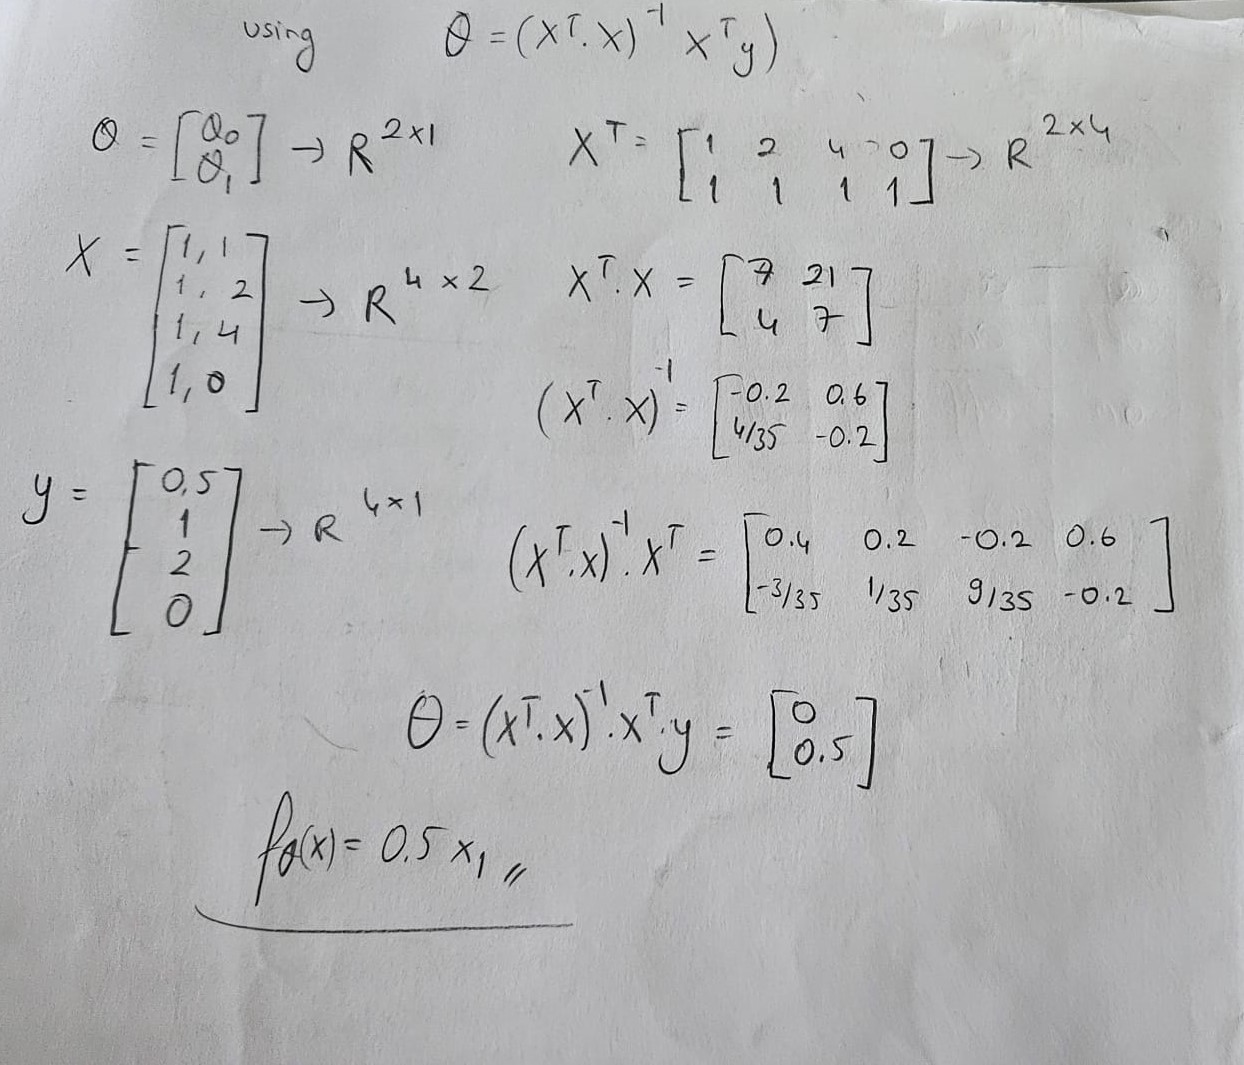

### Question 4 - Answer

When working with real world data, obviously, we see that there are different values for a feature. But those values could be highly varied in terms of magnitude, or the range, or the unit. In order to prevent this situation, feature scaling is important. <br> <br>
For example let's think about a data which has features like "age","house price". We can guess that the "age" values could vary between 0-100 (let's say) and "house price" values could vary between 100.000 dollars to 500.000 dollars. You see, the ranges are too different when we compare those features. By using scaling, we can normalize their values and make them be prepared for the model.

## PART II - Anime Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
anime_df = pd.read_csv("D:\\AIN313\\ASM1\\animes.csv")
anime_df = anime_df.drop(['Name','Image URL','Studios'],axis = 1)
print(anime_df.shape)
anime_df.head()

(24905, 5)


,anime_id,Genres,Type,Source,Duration
0,1,"Action, Award Winning, Sci-Fi",TV,Original,24 min per ep
1,5,"Action, Sci-Fi",Movie,Original,1 hr 55 min
2,6,"Action, Adventure, Sci-Fi",TV,Manga,24 min per ep
3,7,"Action, Drama, Mystery, Supernatural",TV,Original,25 min per ep
4,8,"Adventure, Fantasy, Supernatural",TV,Manga,23 min per ep


In [7]:
rate_df = pd.read_csv("D:\\AIN313\\ASM1\\user_rates_train.csv")
rate_df = rate_df.drop(['Username','Anime Title'], axis = 1)
print(rate_df.shape)
rate_df.head()

(49360, 3)


,user_id,anime_id,rating
0,549,790,9
1,549,306,8
2,549,54,7
3,549,66,8
4,549,28805,9


In [8]:
df = rate_df.merge(anime_df, on = 'anime_id',how = 'left')
df.head()

,user_id,anime_id,rating,Genres,Type,Source,Duration
0,549,790,9,"Mystery, Sci-Fi",TV,Original,25 min per ep
1,549,306,8,"Award Winning, Comedy, Fantasy, Ecchi",TV,Original,24 min per ep
2,549,54,7,"Action, Drama, Sci-Fi",Movie,Manga,1 hr 45 min
3,549,66,8,"Comedy, Slice of Life",TV,4-koma manga,24 min per ep
4,549,28805,9,"Adventure, Fantasy",Movie,Original,1 hr 59 min


In [9]:
df.shape

(49360, 7)

#### Train Set Processing

In [10]:
df['Duration'].unique()

array(['25 min per ep', '24 min per ep', '1 hr 45 min', '1 hr 59 min',
       '23 min per ep', '1 hr 55 min', '30 min per ep', '46 min',
       '25 min', '32 min per ep', '26 min per ep', '2 hr 13 min',
       '2 hr 4 min', '29 min', '33 min', '28 min per ep', '17 min per ep',
       '16 min per ep', '1 hr 41 min', '1 hr 42 min', '3 min per ep',
       '24 min', '29 min per ep', '22 min per ep', '7 min per ep',
       '49 min per ep', '36 min', '1 hr 39 min', '1 hr 22 min',
       '1 hr 48 min', '1 hr 32 min', '2 hr 30 min', '21 min per ep',
       '1 hr 37 min', '1 hr 44 min', '26 min', '40 min', '1 hr 30 min',
       '2 hr', '1 hr 26 min', '37 min per ep', '1 hr 21 min', '15 min',
       '35 min', '3 min', '27 min per ep', '41 min per ep', '1 hr 57 min',
       '1 hr 15 min', '1 hr 31 min', '42 min per ep', '1 hr 46 min',
       '1 hr 51 min', '1 hr 17 min', '55 min', '1 hr 40 min',
       '50 min per ep', '2 hr 7 min', '1 hr 28 min', '2 hr 6 min',
       '28 min', '1 hr 12 min', '1 

In [11]:
#convert every duration value to integer in minute unit.
def convert_to_minutes(duration_str):
    parts = duration_str.split()
    hours = 0
    minutes = 0
    if(parts[1] == "hr"):
        hours = np.array(parts[0],dtype =int).sum()
        if(len(parts) >2 and parts[2] != "per"):
            minutes = np.array(parts[2],dtype =int).sum()
    elif(parts[1] == "min"):
        minutes = np.array(parts[0],dtype =int).sum()
    return hours * 60 + minutes
df['Duration'] = df['Duration'].apply(convert_to_minutes)

In [12]:
df.head()

,user_id,anime_id,rating,Genres,Type,Source,Duration
0,549,790,9,"Mystery, Sci-Fi",TV,Original,25
1,549,306,8,"Award Winning, Comedy, Fantasy, Ecchi",TV,Original,24
2,549,54,7,"Action, Drama, Sci-Fi",Movie,Manga,105
3,549,66,8,"Comedy, Slice of Life",TV,4-koma manga,24
4,549,28805,9,"Adventure, Fantasy",Movie,Original,119


#### One hot encoding for Genres, Type, Source and Studios Columns on the train set

In [13]:
# One hot encoding for columns.
unique_genres = set(','.join(df['Genres']).replace(" ","").split(','))
def process_column(df, unique_column, col_name):
    # Step 1: Create binary columns for each unique genre
    for col in unique_column:
        df[col] = 0


    # Step 2: Populate binary columns based on column presence
    for index, row in df.iterrows():
        for col in row[col_name].replace(" ","").split(','):
            df.at[index, col.strip()] = 1


In [14]:
process_column(df,unique_genres,'Genres')

In [15]:
df = df.drop('Genres',axis = 1)
df.head()

,user_id,anime_id,rating,Type,Source,Duration,Sci-Fi,Fantasy,Hentai,Ecchi,...,BoysLove,Comedy,GirlsLove,Sports,AwardWinning,Drama,Mystery,Action,SliceofLife,Horror
0,549,790,9,TV,Original,25,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,549,306,8,TV,Original,24,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
2,549,54,7,Movie,Manga,105,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,549,66,8,TV,4-koma manga,24,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,549,28805,9,Movie,Original,119,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.columns #Check for any corrupted encoding.

Index(['user_id', 'anime_id', 'rating', 'Type', 'Source', 'Duration', 'Sci-Fi',
       'Fantasy', 'Hentai', 'Ecchi', 'AvantGarde', 'UNKNOWN', 'Romance',
       'Adventure', 'Erotica', 'Suspense', 'Supernatural', 'Gourmet',
       'BoysLove', 'Comedy', 'GirlsLove', 'Sports', 'AwardWinning', 'Drama',
       'Mystery', 'Action', 'SliceofLife', 'Horror'],
      dtype='object')

In [17]:
# Unique values for features.
for col in range(3,7):
    print("Unique values in", df.columns[col], ":   " ,df[df.columns[col]].unique())


Unique values in Type :    ['TV' 'Movie' 'ONA' 'OVA' 'Special' 'Music']
Unique values in Source :    ['Original' 'Manga' '4-koma manga' 'Light novel' 'Web manga' 'Novel'
 'Visual novel' 'Game' 'Book' 'Other' 'Unknown' 'Mixed media' 'Music'
 'Card game' 'Web novel' 'Radio' 'Picture book']
Unique values in Duration :    [ 25  24 105 119  23 115  30  46  32  26 133 124  29  33  28  17  16 101
 102   3  22   7  49  36  99  82 108  92 150  21  97 104  40  90 120  86
  37  81  15  35  27  41 117  75  91  42 106 111  77  55 100  50 127  88
 126  72  85  80  58  59 103   5  48 113  93 121  45  79  98  20  60  87
  94  11  12   1  54  61  14  13  76 161 109  95   4   6  47 112 116   2
 130  64  52  10  67  39 128  51  73  38   8  65  43  69  74  70   9 118
 107  44 140  78 125  31 110  89  57  18 114  34   0  96  83 122  71  19
  62  84 135 160  56 136  53  63 168 132 141 123 149]
Unique values in Sci-Fi :    [1 0]


In [20]:
df.shape

(49360, 28)

In [22]:
unique_types = df['Type'].unique()
unique_sources = df['Source'].unique()

process_column(df,unique_types, 'Type')
df.head()

,user_id,anime_id,rating,Type,Source,Duration,Sci-Fi,Fantasy,Hentai,Ecchi,...,Mystery,Action,SliceofLife,Horror,TV,Movie,ONA,OVA,Special,Music
0,549,790,9,TV,Original,25,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,549,306,8,TV,Original,24,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,549,54,7,Movie,Manga,105,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,549,66,8,TV,4-koma manga,24,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,549,28805,9,Movie,Original,119,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
for col in unique_sources:
    df[col] = 0


for index, row in df.iterrows():
    for col in row['Source'].split(','):
        df.at[index, col.strip()] = 1

In [24]:
df = df.drop(['Type','Source'],axis = 1)
df.head()


,user_id,anime_id,rating,Duration,Sci-Fi,Fantasy,Hentai,Ecchi,AvantGarde,UNKNOWN,...,Visual novel,Game,Book,Other,Unknown,Mixed media,Card game,Web novel,Radio,Picture book
0,549,790,9,25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,549,306,8,24,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,549,54,7,105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,549,66,8,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,549,28805,9,119,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df = df.drop('UNKNOWN',axis = 1)

In [73]:
df.shape

(49360, 47)

#### Implementing KNN, Cosine Similarity, K-Fold  Cross Validation and MAE

In [30]:
# cosine similarity function
from numpy.linalg import norm
def calculate_cos(A,B):
    cosine = np.dot(A,B)/(norm(A)*norm(B))
    return cosine

In [31]:
from collections import Counter
class KNN:

    def __init__(self,k):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    def _predict(self, x_test):
        self.dist = [calculate_cos(x_test, x_train) for x_train in self.X_train]
        k_ind = np.argsort(self.dist)[:self.k]
        neighbours =[self.y_train[i] for i in k_ind]
        predicted_val = np.mean(neighbours)
        return predicted_val
    def weighted_predict(self, X):
        predictions = [self._weighted_predict(x) for x in X]
        return predictions
    def _weighted_predict(self, x_test):
        dist = [calculate_cos(x_test, x_train) for x_train in self.X_train]
        dist = np.array(dist, dtype=float)
        k_ind = np.argsort(dist)[:self.k]
        neighbours =[self.y_train[i] for i in k_ind]

        weights = dist[k_ind]
        weighted_prediction = np.sum(np.array(neighbours) * weights) / np.sum(weights)
        return weighted_prediction
        

In [32]:
# MEAN ABSOLUTE ERROR FUNCTION.
def mean_absolute_error(d_real, d_pred, n):
    mae = 0
    for i in range(n):
        mae+= abs(d_real[i] - d_pred[i])
    mae = mae/n
    return mae

In [114]:
#Dataset splitting for K-Fold CV
import random
def cv_split(dataset, folds):
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)

        # for loop to save each fold
        for i in range(folds):
            fold = []
            # while loop to add elements to the folds
            while len(fold) < fold_size:
                # select a random element
                r = random.randrange(df_copy.shape[0])
                # determine the index of this element
                index = df_copy.index[r]
                # save the randomly selected line
                fold.append(df_copy.loc[index].values.tolist())
                # delete the randomly selected line from
                # dataframe not to select again
                df_copy = df_copy.drop(index)
            # save the fold
            dataset_split.append(np.asarray(fold))

        return dataset_split

In [ ]:
splitted_df = cv_split(df,5)
print(splitted_df)

[array([[325791,   2167,      6, ...,      0,      0,      0],
       [  2434,    269,      8, ...,      0,      0,      0],
       [470879,   6547,      7, ...,      0,      0,      0],
       ...,
       [115029,   3352,      9, ...,      0,      0,      0],
       [351388,  12355,      8, ...,      0,      0,      0],
       [550857,   1604,     10, ...,      0,      0,      0]]), array([[ 944545,     350,       7, ...,       0,       0,       0],
       [  95637,     813,       8, ...,       0,       0,       0],
       [ 508783,    5681,       7, ...,       0,       0,       0],
       ...,
       [  20949,    1281,      10, ...,       0,       0,       0],
       [1058503,    9989,       8, ...,       0,       0,       0],
       [ 376982,      94,       7, ...,       0,       0,       0]]), array([[ 80238,   1829,      6, ...,      0,      0,      0],
       [102227,    550,     10, ...,      0,      0,      0],
       [471515,    934,      8, ...,      0,      0,      0],
     

In [ ]:
# CV function.
def cv(data, f, k):
    errors = []
    # determine training and test sets
    for i in range(f):
        X_train = []
        for j in range(5):
            X_train.append(np.delete(data[j],2,1))
        X_test = X_train[i]
        del X_train[i]
        X_train = np.concatenate(X_train, axis=0)

        Y_train = []
        for j in range(5):
            Y_train.append(splitted_df[j][:, 2:3])
        Y_test = Y_train[i]
        Y_test = np.concatenate(Y_test, axis=None)
        del Y_train[i]
        Y_train = np.concatenate(Y_train, axis=None)

        model = KNN(k)
        model.fit(X_train,Y_train)
        y_pred = model.predict(X_test)
        error = mean_absolute_error(Y_test,y_pred,len(Y_test))
        errors.append(error)

    for i in len(errors):
        print("MAE is : ", errors[i])
    print("Average MAE is: ", np.mean(errors))
    return errors

#### Test set processing

In [33]:
test = pd.read_csv("D:\\AIN313\\ASM1\\user_rates_test.csv")
test.head()

,user_id,Username,anime_id,Anime Title,rating
0,15885,hardcoreBC,2026,Hayate no Gotoku!,9
1,15885,hardcoreBC,120,Fruits Basket,10
2,15885,hardcoreBC,71,Full Metal Panic!,9
3,15885,hardcoreBC,72,Full Metal Panic? Fumoffu,10
4,15885,hardcoreBC,121,Fullmetal Alchemist,9


In [34]:
test = test.drop(['Username','Anime Title'],axis =1)
test.head()

,user_id,anime_id,rating
0,15885,2026,9
1,15885,120,10
2,15885,71,9
3,15885,72,10
4,15885,121,9


In [35]:
test.shape

(877, 3)

In [36]:
test = test.merge(anime_df, on = 'anime_id',how = 'left')

In [37]:
#convert every duration value to integer in minute unit.
def convert_to_minutes(duration_str):
    parts = duration_str.split()
    hours = 0
    minutes = 0
    if(parts[1] == "hr"):
        hours = np.array(parts[0],dtype =int).sum()
        if(len(parts) >2 and parts[2] != "per"):
            minutes = np.array(parts[2],dtype =int).sum()
    elif(parts[1] == "min"):
        minutes = np.array(parts[0],dtype =int).sum()
    return hours * 60 + minutes
test['Duration'] = test['Duration'].apply(convert_to_minutes)

In [38]:
test.head()

,user_id,anime_id,rating,Genres,Type,Source,Duration
0,15885,2026,9,"Action, Comedy, Romance",TV,Manga,24
1,15885,120,10,"Drama, Romance, Supernatural",TV,Manga,24
2,15885,71,9,"Action, Comedy, Sci-Fi",TV,Light novel,24
3,15885,72,10,"Action, Comedy",TV,Light novel,24
4,15885,121,9,"Action, Adventure, Award Winning, Drama, Fantasy",TV,Manga,24


#### One hot encoding for Genres, Type, Source and Studios Columns on the test set

In [39]:
process_column(test,unique_genres, 'Genres')
test = test.drop('Genres',axis = 1)
test.head()

,user_id,anime_id,rating,Type,Source,Duration,Sci-Fi,Fantasy,Hentai,Ecchi,...,BoysLove,Comedy,GirlsLove,Sports,AwardWinning,Drama,Mystery,Action,SliceofLife,Horror
0,15885,2026,9,TV,Manga,24,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,15885,120,10,TV,Manga,24,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,15885,71,9,TV,Light novel,24,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,15885,72,10,TV,Light novel,24,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,15885,121,9,TV,Manga,24,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0


In [40]:
test.shape

(877, 28)

In [43]:
for col in unique_sources:
    test[col] = 0


for index, row in test.iterrows():
    for col in row['Source'].split(','):
        test.at[index, col.strip()] = 1

In [44]:
process_column(test,unique_types, 'Type')

test = test.drop(['Type','Source'],axis = 1)
test.head()

,user_id,anime_id,rating,Duration,Sci-Fi,Fantasy,Hentai,Ecchi,AvantGarde,UNKNOWN,...,Music,Card game,Web novel,Radio,Picture book,TV,Movie,ONA,OVA,Special
0,15885,2026,9,24,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,15885,120,10,24,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,15885,71,9,24,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,15885,72,10,24,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,15885,121,9,24,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
test = test.drop('UNKNOWN',axis =1)

In [74]:
test.shape

(877, 47)

In [46]:
# Checking if difference exist in the test and train dataframes.
difference = np.setdiff1d(df.columns, test.columns)
print(difference)

[]


In [47]:
y_train = df['rating'].values
x_train = df[df.drop(['rating'],axis =1).columns].values

real_ratings = test['rating']
x_test = test[test.drop(['rating'],axis =1).columns].values

#### Prediction with k = 3 ( Not weighted)

In [48]:
model_1 = KNN(3)
model_1.fit(x_train,y_train)


In [49]:
prediction1 = model_1.predict(x_test)

In [50]:
error_1= mean_absolute_error(real_ratings.tolist(),prediction1,test.shape[0])

#### Prediction with k = 5 (Not weighted)

In [51]:
model_2 = KNN(5)
model_2.fit(x_train,y_train)

In [52]:
prediction2 = model_2.predict(x_test)

In [53]:
error_2 = mean_absolute_error(real_ratings.tolist(),prediction2,test.shape[0])

In [54]:
print(error_2)

1.1220068415051312


#### Prediction with k = 7 (Not weighted)

In [55]:
model_3 = KNN(7)
model_3.fit(x_train,y_train)

In [56]:
prediction3 = model_3.predict(x_test)

In [57]:
error_3 = mean_absolute_error(real_ratings.tolist(),prediction3,test.shape[0])

In [58]:
print(error_3)

1.1220068415051312


#### Prediction with k = 3 (Weighted)

In [62]:
prediction_w1 = model_1.weighted_predict(x_test)

In [63]:
error_1_weighted= mean_absolute_error(real_ratings.tolist(),prediction_w1 ,test.shape[0])

#### Prediction with k = 5 (Weighted)

In [64]:
prediction_w2 = model_2.weighted_predict(x_test)

In [65]:
error_2_weighted= mean_absolute_error(real_ratings.tolist(),prediction_w2,test.shape[0])

#### Prediction with k = 7 (Weighted)

In [66]:
prediction_w3 = model_3.weighted_predict(x_test)

In [67]:
error_3_weighted= mean_absolute_error(real_ratings.tolist(),prediction_w3,test.shape[0])

# Results And Analysis

In [60]:
k_values = [3, 5, 7]  # The k values
errors = [error_1,error_2,error_3]  # The corresponding error values

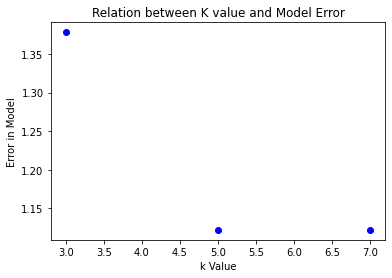

In [61]:
knn_erorrs = plt.scatter(k_values, errors, marker='o', c='b')

plt.xlabel('k Value')
plt.ylabel('Error in Model')
plt.title('Relation between K value and Model Error')

plt.show()

When we look at the plot, we see when k =3 model has the highest error. And for k = 5 and k = 7 there is no significant change in error. We can conclude that     k = 5 is the optimal choice.

In [68]:
errors = [error_1_weighted,error_2_weighted,error_3_weighted]  # The corresponding error values

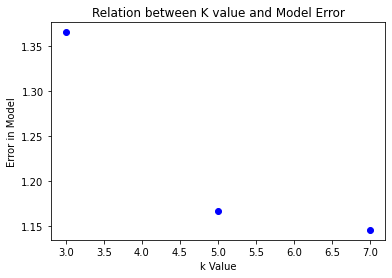

In [69]:
weighted_knn_erorrs = plt.scatter(k_values, errors, marker='o', c='b')

plt.xlabel('k Value')
plt.ylabel('Error in Model')
plt.title('Relation between K value and Model Error')

plt.show()

When we look at the plot for the weighted KNN model, for k=3 we get the highest error rate. After k=3 error rate decreases. This time there is still not a big change on the error but the change is considerable for choosing the optimal K value.

## Report

### General Overview 

In this assignment, the main purpose is building a machine learning system that tries to predict the rating the user will give to the anime. To reach this goal, the system considers the existing users, their rates and also the features of the anime they watched. Since the features such as type, source, duration and genre can be effective on the rating or a user's preference. In this way, more realistic prediction could be done.

### Points To Remember 

* There was an 'UNKNOWN' column in the data which came from the preprocessing, since users it does not give any proper information, it is deleted.

* After preprocessing 47 column is created.

* In KNN, as a similarity calculation, cosine similarity is chosen.

* While doing one hot encoding, there are some problems faced such as strip problem in the "Studio" column. For example, a value like " x Studio", but in some other row it is written as "xStudio". So if pd.getdummies() funcion is used, it considers this values differently and creates different columns. In order to prevent that a scratch one hot encoding function is used.

* In the data the 'Duration' values contains numeric and string types. In order to use them on the model training, they are converted into minutes in integer.

* But after the new announcement, the 'Studios' column is deleted to decrease the runtime.

* For K=3, model works on the test set in 13 minutes which has 877 rows. K-Fold cross validation functions are implemented. In the sense of K-fold for each sub dataframe contains 10k rows which is 10 times bigger, so running this function will take too much time. Therefore, it is decided not to run that code part, but it is implemented.

